## BOOM BIKE ASSIGNMENT

In [98]:
# Suppressing warnings and importing required libries
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
# Reading the data  with  help of pandas 
bike=pd.read_csv("C://Users//Uday Kumar Reddy//Downloads//day.csv")

In [100]:
# Getting of the data set info here al well we can  check for data types how many coloumn are present  what type of coloumn etc 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [101]:
#checking nulls for te data set 
100*bike.isnull().mean()


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [102]:
#Descibing the data in data frame 
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [103]:
# Getting familirised with data 

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [104]:
# checking any coloumns are there to drop  as instant  is the record  index as we dont need  so we can drop 
# we can drop casual and registered  as its the differention of cnt coloumns 

bike=bike.drop('instant',axis=1)
bike=bike.drop('casual',axis=1)
bike=bike.drop('registered',axis=1)


In [105]:
#Checking coloumns "instant" has been dropped -yes it was dropped successfully
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [106]:
# Here i could see 'dteday' coloumn  has date values but was not provided as as seperate coloumn values such as 'yr' and 'mnth'
bike['dateofmonth'] = pd.DatetimeIndex(bike['dteday']).month

# Here 'dateofmonth' is the date of the which user opted/booked/used the services of the  boom bike

In [107]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dateofmonth
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


In [108]:
 # here we can drop dteday as the  all values extracted already present in the data set as 
#invdividual coloumns 'yr','mnth' & 'dateofmonth'
bike=bike.drop('dteday',axis=1)   

In [109]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dateofmonth
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


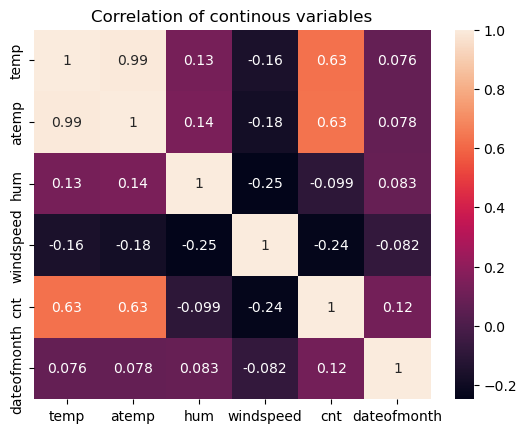

In [110]:
# Vizuvalising data set  for the checking any linear pattern for  correlation
vizuvaalisationofintfeatures=bike[['temp','atemp','hum','windspeed','cnt','dateofmonth']]
sns.heatmap(vizuvaalisationofintfeatures.corr(),annot=True)
plt.title('Correlation of continous variables')
plt.show()

# here temp and atemp  are highlly correlated  ths leads to multi colinarity so we cannot  use these in model building one has to be dropped   

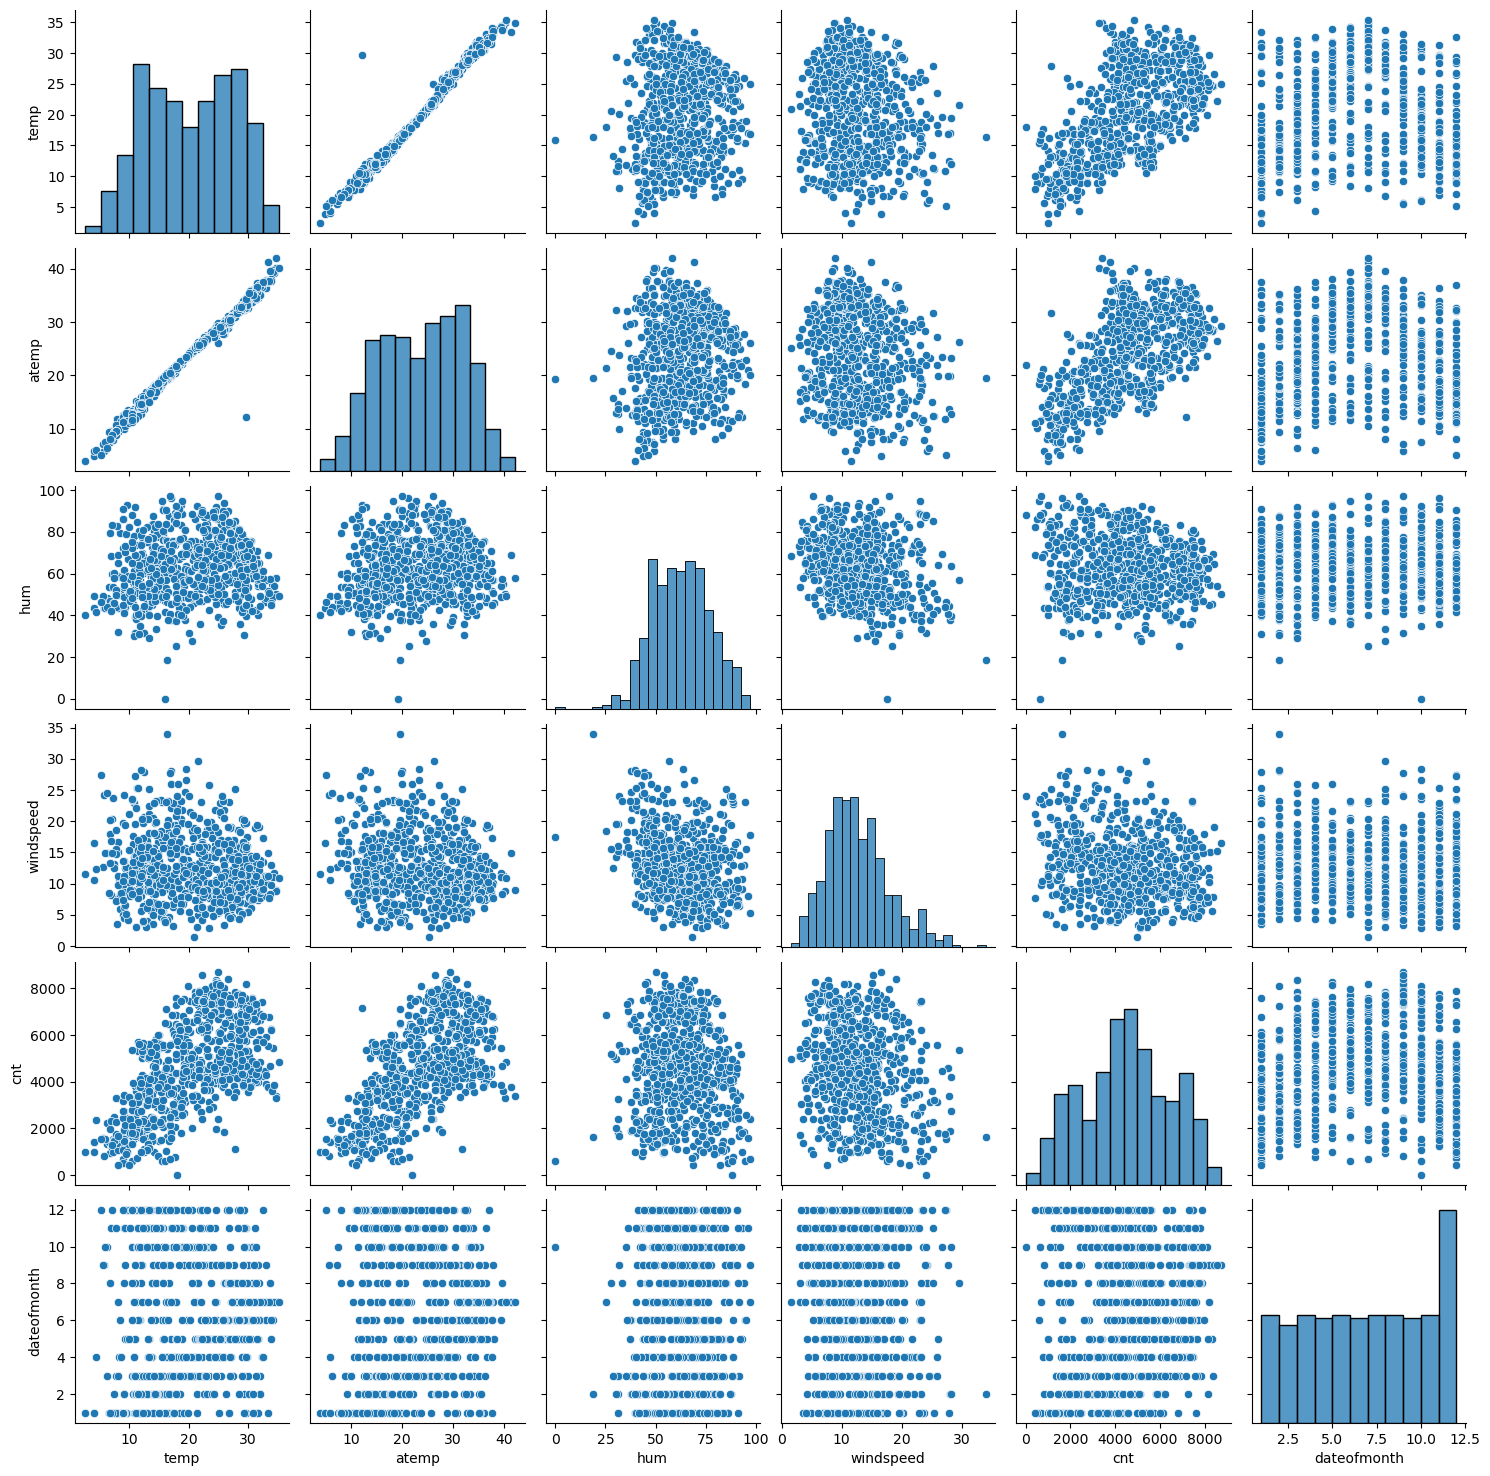

In [111]:
# Vizuvalising data set  for the checking any linear pattern for numerical variables  and correlation 

vizuvaalisationofintfeatures=bike[['temp','atemp','hum','windspeed','cnt','dateofmonth']]
sns.pairplot(vizuvaalisationofintfeatures)
plt.show()




## map to colomns  to it respective  catagorical values

In [112]:


# create dummies for the cloumns 'seasons' ,'mnth','weekday'and 'weathersit'
# fist we need to map to colomns  to it respective  categarical values 

bike['season']=bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['mnth']=bike['mnth'].map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})
bike['weekday']=bike['weekday'].map({0:'SUN',1:'MON',2:'TUE',3:'WED',4:'THU',5:'FRI',6:'SAT'})
bike['weathersit']=bike['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

vizuvlisationofcategoricalvariaable=bike[['season','yr','mnth','holiday','weekday','workingday','weathersit','cnt']]

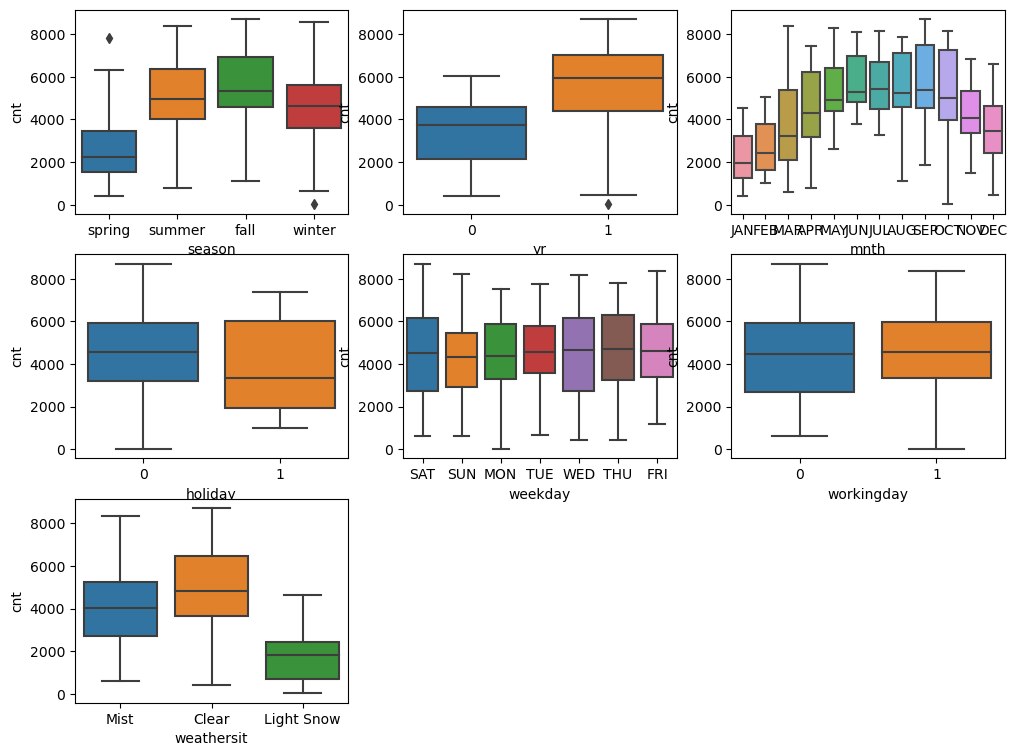

In [113]:
# checking the distribution of the data of the categorical coloumns

plt.figure(figsize=(12,9))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=vizuvlisationofcategoricalvariaable)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=vizuvlisationofcategoricalvariaable)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=vizuvlisationofcategoricalvariaable)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=vizuvlisationofcategoricalvariaable)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=vizuvlisationofcategoricalvariaable)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=vizuvlisationofcategoricalvariaable)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=vizuvlisationofcategoricalvariaable)

plt.show()

# observations 

# The cnt is higher is for season fall
# The cnt is higher for the yr 1 which means for year 2019 
# The cnt distribution is higher  at sep mnth 
# The cnt distribution is higher when holiday  value is '0'
# The cnt median same across all week day but 75 percent is more 4 the weekday 
# The cnt median or 50% is same for workind day and non working day 
# The cnt is distributed more for the weathersit  for 1 which is " Clear, Few clouds, Partly cloudy, Partly cloudy"
 # and follows  2 & 3  which  are "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"  and "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"

In [114]:
# Encoding is already  exsisted for the data set with coloumns'yr','holiday' and 'workingday'  so no need to encode these coloumns again 


In [115]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   hum          730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
 12  dateofmonth  730 non-null    int32  
dtypes: float64(4), int32(1), int64(4), object(4)
memory usage: 71.4+ KB


In [116]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dateofmonth
0,spring,0,JAN,0,SAT,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,JAN,0,SUN,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,JAN,0,MON,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,JAN,0,TUE,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,JAN,0,WED,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


# multicolinearity variable 

In [117]:
bike=bike.drop('atemp',axis=1)
bike.info()

# droppig atemp variable as it has multicolinearity with variable temp 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   hum          730 non-null    float64
 9   windspeed    730 non-null    float64
 10  cnt          730 non-null    int64  
 11  dateofmonth  730 non-null    int32  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 65.7+ KB


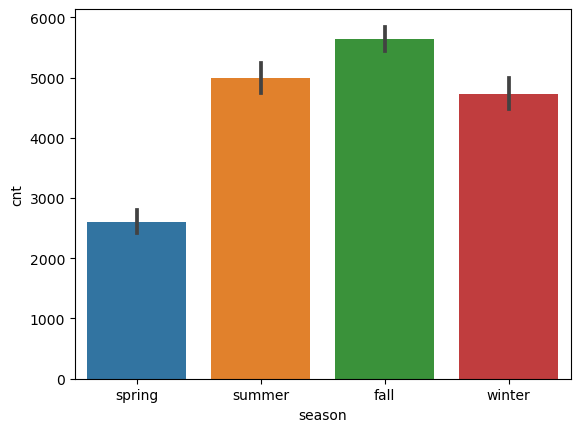

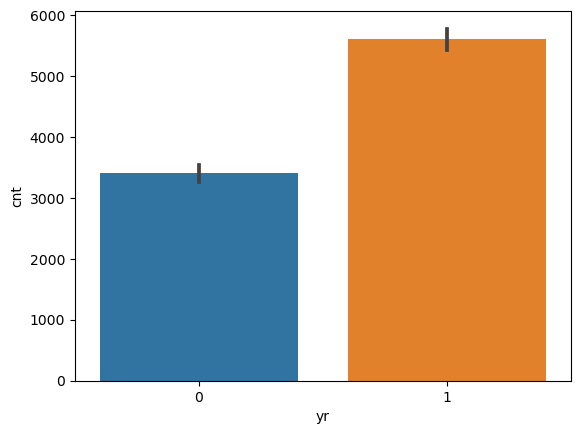

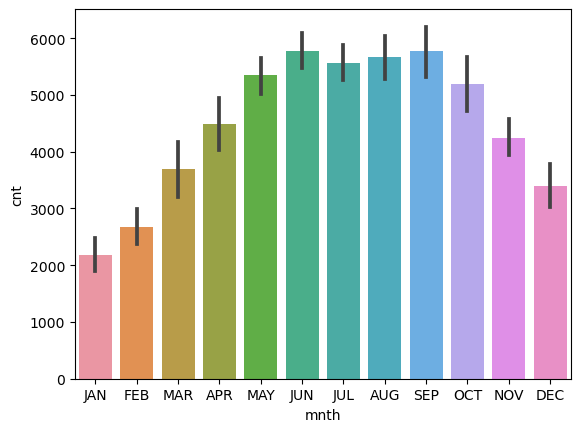

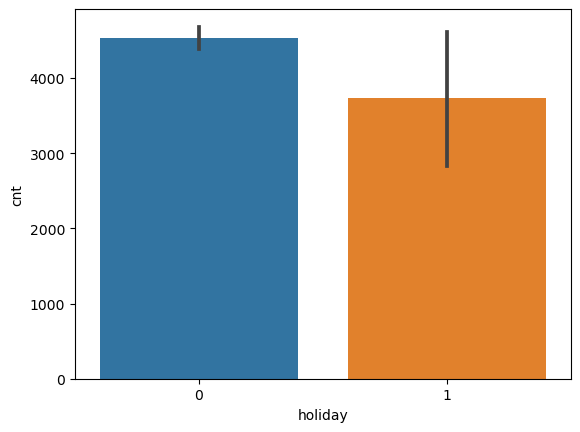

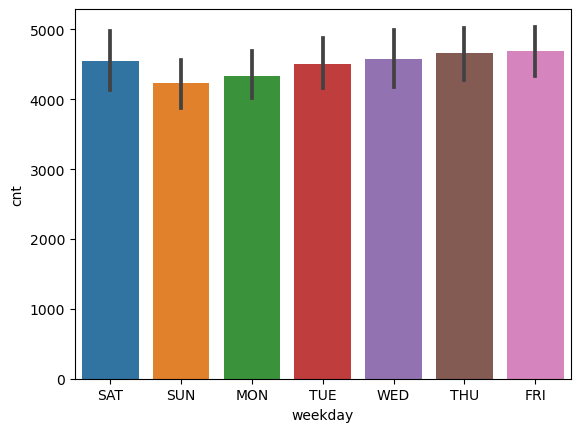

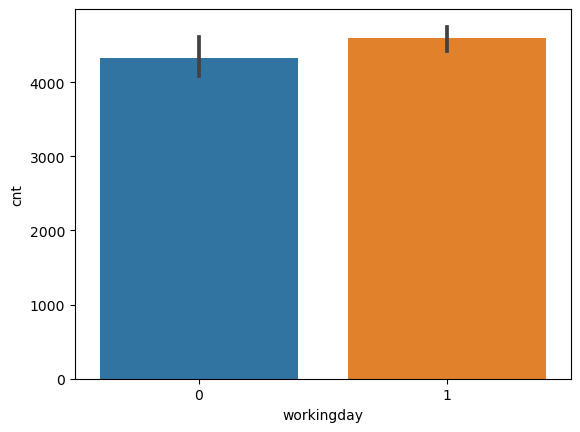

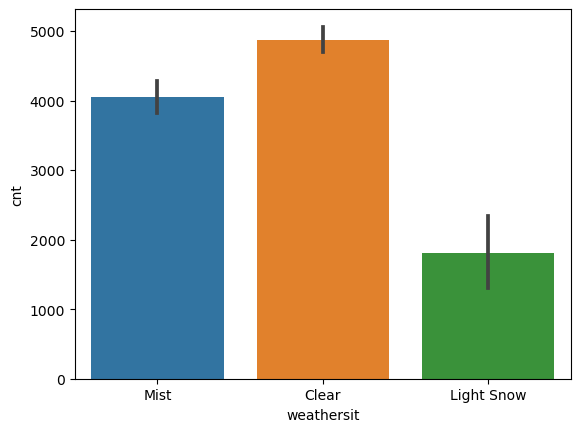

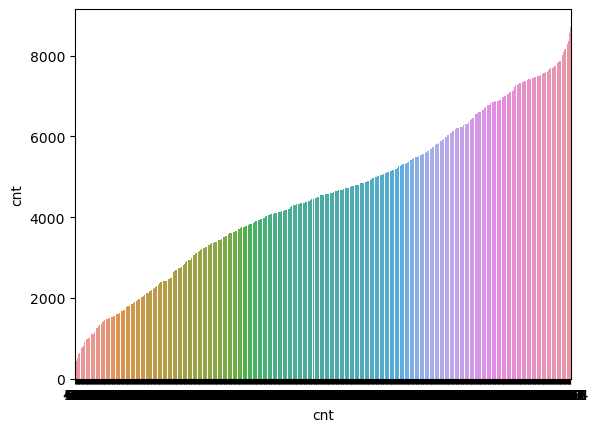

In [118]:
for item in vizuvlisationofcategoricalvariaable:
    sns.barplot(x=item,y='cnt',data=vizuvlisationofcategoricalvariaable)
    plt.show()

In [119]:
vizuvlisationofcategoricalvariaable.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,spring,0,JAN,0,SAT,0,Mist,985
1,spring,0,JAN,0,SUN,0,Mist,801
2,spring,0,JAN,0,MON,1,Clear,1349
3,spring,0,JAN,0,TUE,1,Clear,1562
4,spring,0,JAN,0,WED,1,Clear,1600


## create dummies for the cloumns 'seasons' ,'mnth','weekday'and 'weathersit'

In [120]:
month_f=pd.get_dummies(bike['mnth'],drop_first=True,dtype=int)
season_f=pd.get_dummies(bike['season'],drop_first=True,dtype=int)
weekday_f=pd.get_dummies(bike['weekday'],drop_first=True,dtype=int)
weathersit_f=pd.get_dummies(bike['weathersit'],drop_first=True,dtype=int)

# Merging the data frame  for the dummies created with exsisting one dataset

In [121]:
# Merging the data frame 
bike_new=pd.concat([bike,month_f,season_f,weekday_f,weathersit_f],axis=1)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   hum          730 non-null    float64
 9   windspeed    730 non-null    float64
 10  cnt          730 non-null    int64  
 11  dateofmonth  730 non-null    int32  
 12  AUG          730 non-null    int32  
 13  DEC          730 non-null    int32  
 14  FEB          730 non-null    int32  
 15  JAN          730 non-null    int32  
 16  JUL          730 non-null    int32  
 17  JUN          730 non-null    int32  
 18  MAR          730 non-null    int32  
 19  MAY     

In [122]:
# Getting familier with the new data set created 
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,summer,winter,MON,SAT,SUN,THU,TUE,WED,Light Snow,Mist
0,spring,0,JAN,0,SAT,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,JAN,0,SUN,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,JAN,0,MON,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,JAN,0,TUE,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,JAN,0,WED,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [123]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   hum          730 non-null    float64
 9   windspeed    730 non-null    float64
 10  cnt          730 non-null    int64  
 11  dateofmonth  730 non-null    int32  
 12  AUG          730 non-null    int32  
 13  DEC          730 non-null    int32  
 14  FEB          730 non-null    int32  
 15  JAN          730 non-null    int32  
 16  JUL          730 non-null    int32  
 17  JUN          730 non-null    int32  
 18  MAR          730 non-null    int32  
 19  MAY     

In [124]:
# dropping unnesessary coloumns
bike_new=bike_new.drop(['season','mnth','weekday','weathersit','dateofmonth'],axis=1)

In [125]:
# crossing checking the coloumns has been dropped sucessfully
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   AUG         730 non-null    int32  
 8   DEC         730 non-null    int32  
 9   FEB         730 non-null    int32  
 10  JAN         730 non-null    int32  
 11  JUL         730 non-null    int32  
 12  JUN         730 non-null    int32  
 13  MAR         730 non-null    int32  
 14  MAY         730 non-null    int32  
 15  NOV         730 non-null    int32  
 16  OCT         730 non-null    int32  
 17  SEP         730 non-null    int32  
 18  spring      730 non-null    int32  
 19  summer      730 non-null    i

In [126]:
bike_new.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,AUG,DEC,FEB,...,summer,winter,MON,SAT,SUN,THU,TUE,WED,Light Snow,Mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.084932,0.084932,0.076712,...,0.252055,0.243836,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.278971,0.278971,0.266317,...,0.434490,0.429689,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   AUG         730 non-null    int32  
 8   DEC         730 non-null    int32  
 9   FEB         730 non-null    int32  
 10  JAN         730 non-null    int32  
 11  JUL         730 non-null    int32  
 12  JUN         730 non-null    int32  
 13  MAR         730 non-null    int32  
 14  MAY         730 non-null    int32  
 15  NOV         730 non-null    int32  
 16  OCT         730 non-null    int32  
 17  SEP         730 non-null    int32  
 18  spring      730 non-null    int32  
 19  summer      730 non-null    i

## split into train and test 

In [128]:
df_train,df_test = train_test_split(bike_new, train_size=0.7,random_state=100)


In [129]:
df_train.shape

(510, 29)

In [130]:
df_test.shape

(220, 29)

In [131]:
bike_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,AUG,DEC,FEB,...,summer,winter,MON,SAT,SUN,THU,TUE,WED,Light Snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## scaling  normalization/standatization 

In [132]:
# scaling  normalization/standatization -i opted for normalization--M min and Mmax values etc 
scaler=MinMaxScaler()
numvariables=['temp','hum','windspeed','cnt']

df_train[numvariables]=scaler.fit_transform(df_train[numvariables])
df_train.head()



,yr,holiday,workingday,temp,hum,windspeed,cnt,AUG,DEC,FEB,...,summer,winter,MON,SAT,SUN,THU,TUE,WED,Light Snow,Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [133]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,AUG,DEC,FEB,...,summer,winter,MON,SAT,SUN,THU,TUE,WED,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.247059,0.247059,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.431725,0.431725,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   cnt         510 non-null    float64
 7   AUG         510 non-null    int32  
 8   DEC         510 non-null    int32  
 9   FEB         510 non-null    int32  
 10  JAN         510 non-null    int32  
 11  JUL         510 non-null    int32  
 12  JUN         510 non-null    int32  
 13  MAR         510 non-null    int32  
 14  MAY         510 non-null    int32  
 15  NOV         510 non-null    int32  
 16  OCT         510 non-null    int32  
 17  SEP         510 non-null    int32  
 18  spring      510 non-null    int32  
 19  summer      510 non-null    int3

## Training the Model

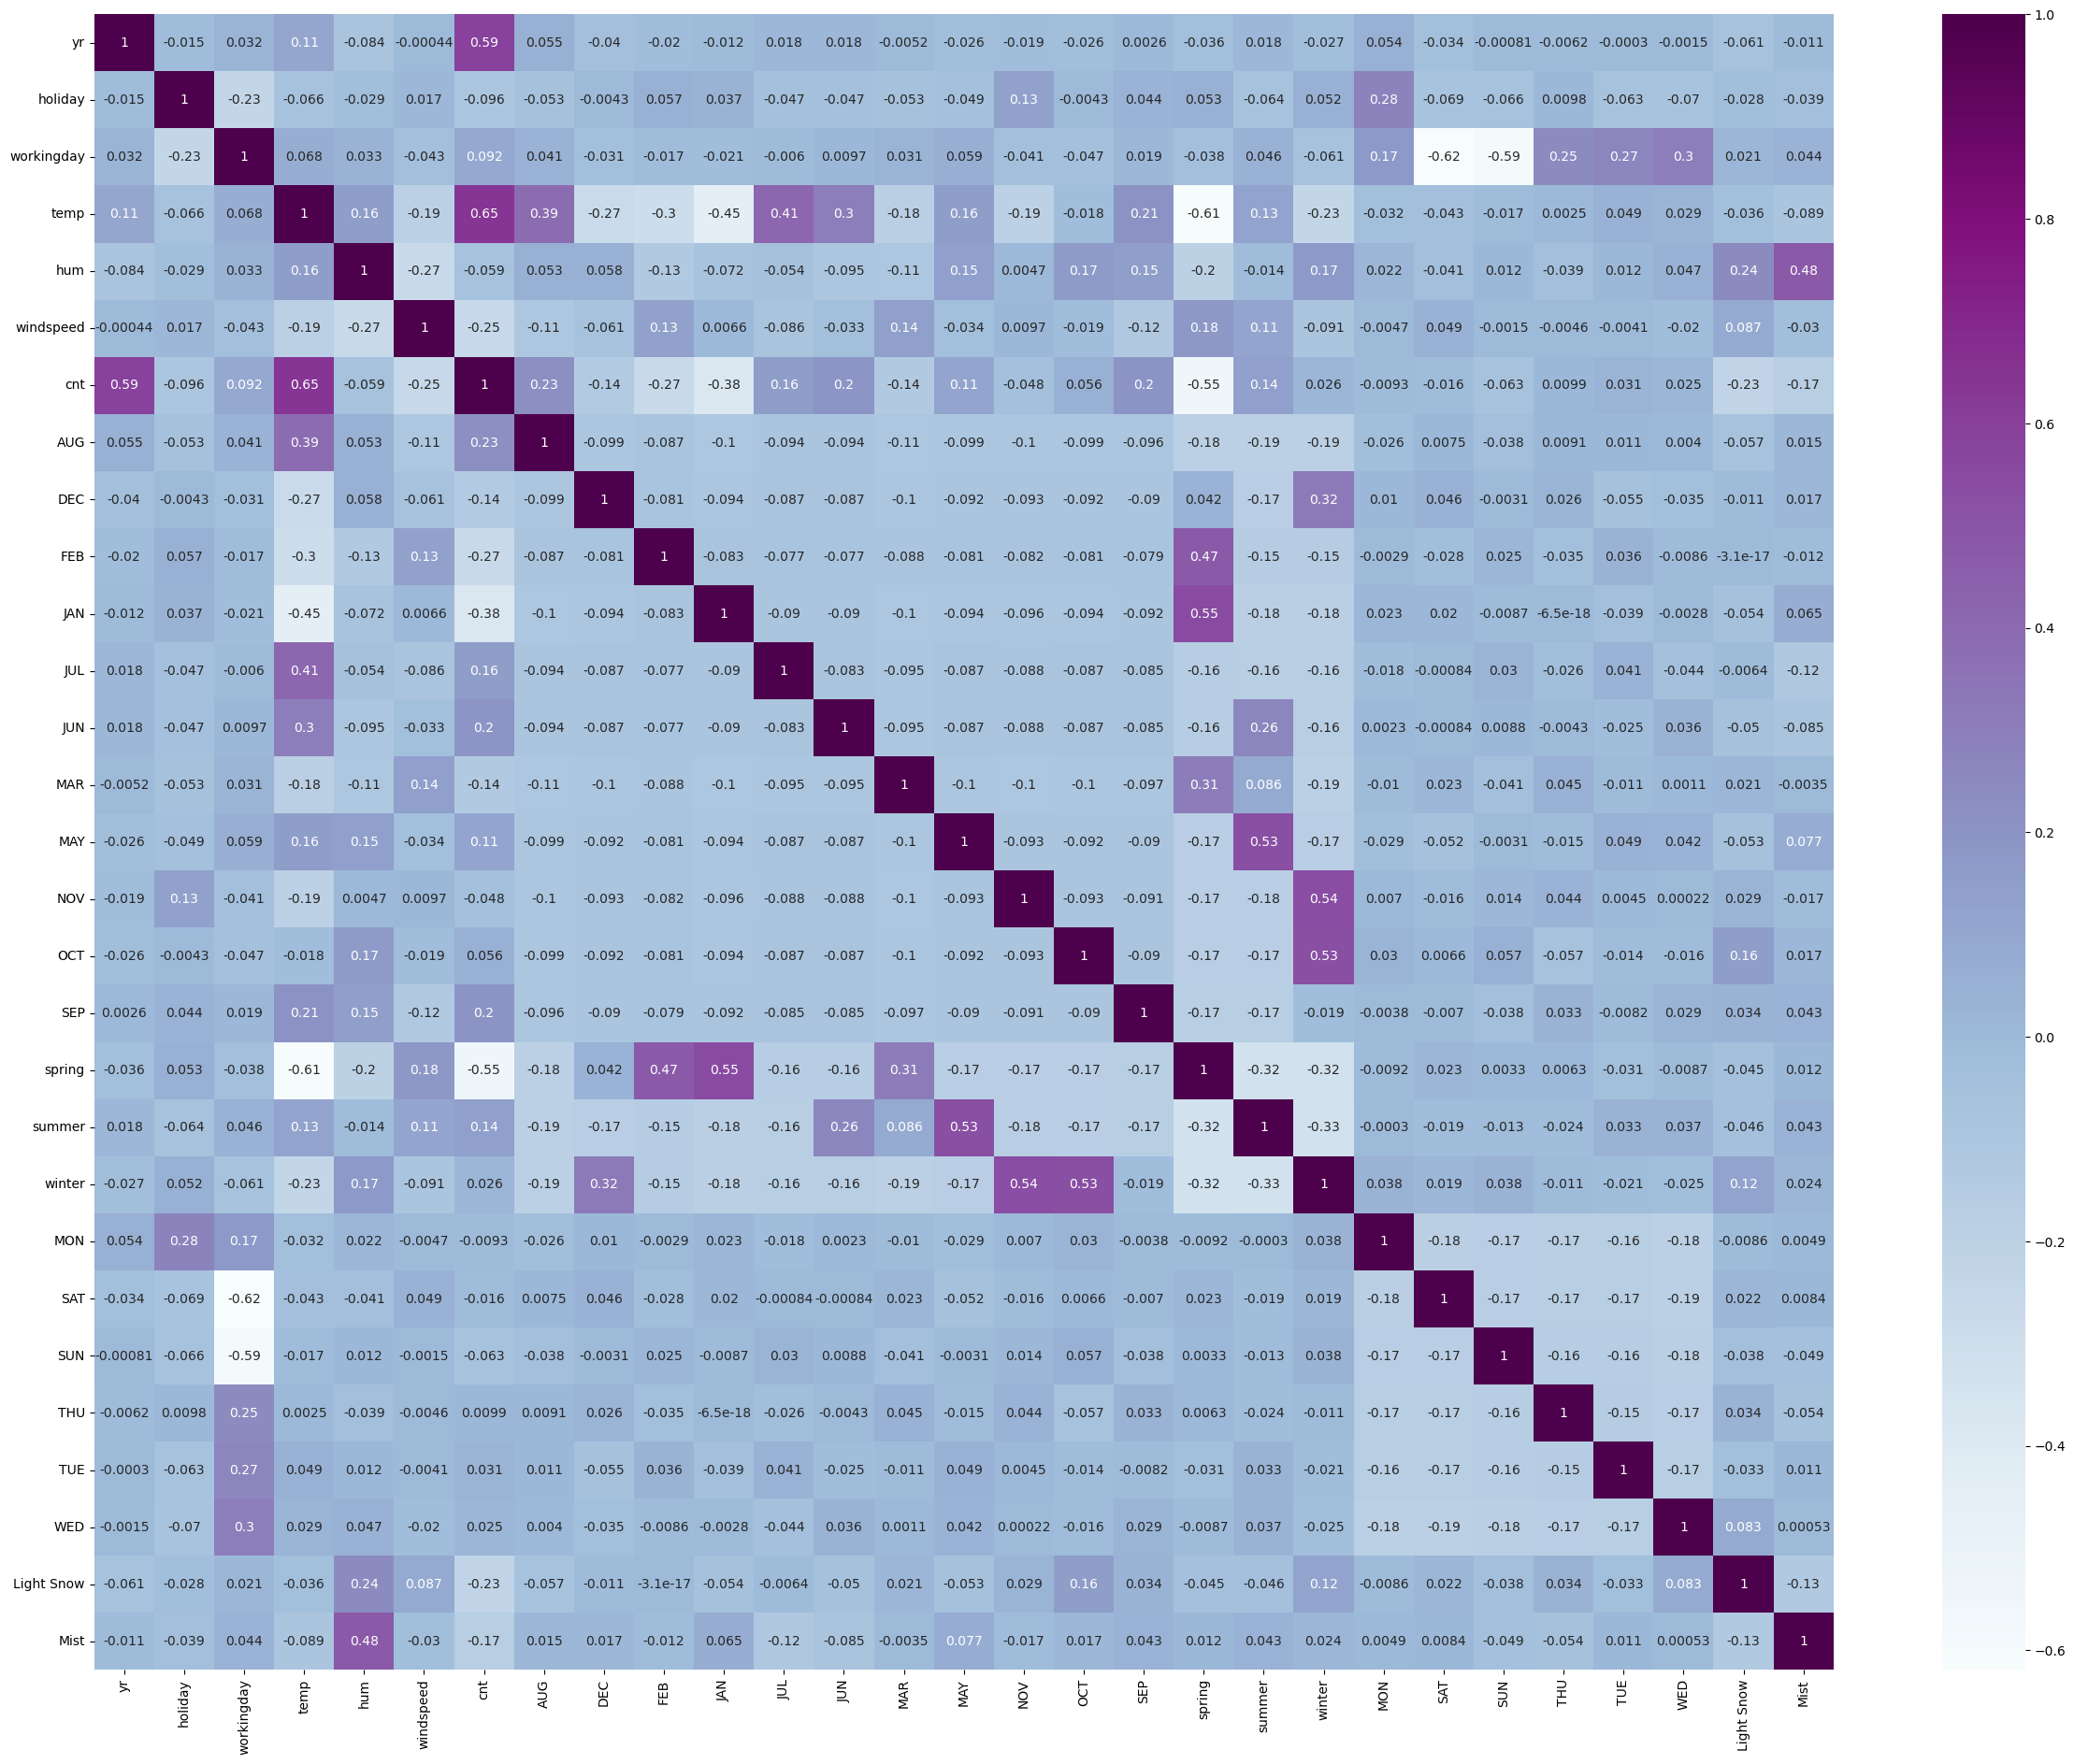

In [135]:
# Heatmap for training model 
plt.figure(figsize=(30,23))
sns.heatmap(df_train.corr(),annot=True,cmap='BuPu')
plt.show()

# cnt coloumn has correlation with variable year and temp.
# Misty and humidity has correlation 
# jan and feb has correlation with spring variable 
# nov and oct has correlation with winter variable

In [136]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,AUG,DEC,FEB,...,summer,winter,MON,SAT,SUN,THU,TUE,WED,Light Snow,Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [137]:
# creating X_train, y_train

y_train=df_train.pop('cnt')
X_train=df_train

In [138]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,AUG,DEC,FEB,JAN,...,summer,winter,MON,SAT,SUN,THU,TUE,WED,Light Snow,Mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [139]:
# add constant 
X_train_sm=sm.add_constant(X_train['yr'])
#  first model of linear regression model 

lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

# params

lr_model.params




const    0.378803
yr       0.265232
dtype: float64

In [140]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.95e-49
Time:                        12:15:04   Log-Likelihood:                 148.67
No. Observations:                 510   AIC:                            -293.3
Df Residuals:                     508   BIC:                            -284.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3788      0.011     33.131      0.000       0.356       0.401
yr             0.2652      0.016     16.531      0.000       0.234       0.297
==============================================================================
Omnibus:                       27.322   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.203
Skew:                          -0.560   Prob(JB):                     4.56e-07
Kurtosis:                       2.654   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
#  second  model of linear regression model
#Adding additionl  variables
X_train_sm = X_train[['yr','temp']]
X_train_sm = sm.add_constant(X_train_sm)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params


const    0.079266
yr       0.236739
temp     0.584266
dtype: float64

In [142]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.34e-130
Time:                        12:15:04   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
yr             0.2367      0.011     21.276      0.000       0.215       0.259
temp           0.5843      0.025     23.698      0.000       0.536       0.633
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
#   Third model of linear regression model
#Adding additionl  variables
X_train_sm = X_train[['yr','temp','AUG']]
X_train_sm = sm.add_constant(X_train_sm)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params


const    0.074629
yr       0.236939
temp     0.597344
AUG     -0.025958
dtype: float64

In [144]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     379.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.99e-129
Time:                        12:15:09   Log-Likelihood:                 339.61
No. Observations:                 510   AIC:                            -671.2
Df Residuals:                     506   BIC:                            -654.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0746      0.015      4.870      0.000       0.045       0.105
yr             0.2369      0.011     21.305      0.000       0.215       0.259
temp           0.5973      0.027     22.384      0.000       0.545       0.650
AUG           -0.0260      0.020     -1.276      0.203      -0.066       0.014
==============================================================================
Omnibus:                       34.232   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.639
Skew:                          -0.537   Prob(JB):                     7.46e-11
Kurtosis:                       4.020   Cond. No.                         7.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
# Fourth  model of linear regression model
# Adding all variables 
X_train_sm = sm.add_constant(X_train)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.00e-181
Time:                        12:15:12   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2431      0.035      6.888      0.000       0.174       0.312
yr             0.2324      0.008     28.819      0.000       0.217       0.248
holiday        0.0100      0.024      0.418      0.676      -0.037       0.057
workingday     0.0962      0.012      7.835      0.000       0.072       0.120
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
AUG            0.0204      0.034      0.607      0.544      -0.046       0.086
DEC           -0.0443      0.034     -1.317      0.189      -0.110       0.022
FEB           -0.0324      0.033     -0.985      0.325      -0.097       0.032
JAN           -0.0633      0.034     -1.885      0.060      -0.129       0.003
JUL           -0.0338      0.035     -0.969      0.333      -0.102       0.035
JUN            0.0046      0.025      0.186      0.853      -0.044       0.053
MAR            0.0013      0.025      0.052      0.959      -0.047       0.050
MAY            0.0247      0.021      1.173      0.241      -0.017       0.066
NOV           -0.0399      0.036     -1.096      0.274      -0.111       0.032
OCT            0.0075      0.036      0.210      0.834      -0.063       0.078
SEP            0.0859      0.032      2.692      0.007       0.023       0.149
spring        -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer         0.0430      0.026      1.645      0.101      -0.008       0.094
winter         0.1076      0.028      3.853      0.000       0.053       0.163
MON           -0.0209      0.015     -1.365      0.173      -0.051       0.009
SAT            0.0956      0.014      6.958      0.000       0.069       0.123
SUN            0.0413      0.014      2.964      0.003       0.014       0.069
THU           -0.0091      0.016     -0.588      0.557      -0.040       0.021
TUE           -0.0179      0.016     -1.156      0.248      -0.048       0.013
WED           -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [146]:
# check for significance  and vif values ---High p value and high vif coloumns must be removed ,Low p & low vif need to  be intact 
# high p valve and low vif need to be removed first  later low p and high vif  need to be removed  and check weather vif is decreased .

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.54
21,SAT,19.71
22,SUN,18.34
17,spring,10.75
19,winter,9.44
18,summer,8.27
3,temp,7.08
14,NOV,6.79
15,OCT,6.47
6,AUG,6.36


In [148]:
# Fifth  model of linear regression model
X=X_train.drop(['MAR'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.87e-182
Time:                        12:16:10   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2437      0.033      7.378      0.000       0.179       0.309
yr             0.2324      0.008     28.848      0.000       0.217       0.248
holiday        0.0102      0.024      0.427      0.670      -0.037       0.057
workingday     0.0963      0.012      8.149      0.000       0.073       0.120
temp           0.4450      0.046      9.763      0.000       0.355       0.535
hum           -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed     -0.1861      0.026     -7.245      0.000      -0.237      -0.136
AUG            0.0198      0.032      0.627      0.531      -0.042       0.082
DEC           -0.0454      0.026     -1.748      0.081      -0.096       0.006
FEB           -0.0337      0.022     -1.512      0.131      -0.078       0.010
JAN           -0.0646      0.022     -2.892      0.004      -0.109      -0.021
JUL           -0.0344      0.033     -1.035      0.301      -0.100       0.031
JUN            0.0042      0.023      0.179      0.858      -0.042       0.050
MAY            0.0243      0.020      1.235      0.218      -0.014       0.063
NOV           -0.0409      0.031     -1.329      0.185      -0.101       0.020
OCT            0.0066      0.031      0.215      0.830      -0.054       0.067
SEP            0.0852      0.029      2.945      0.003       0.028       0.142
spring        -0.0443      0.028     -1.563      0.119      -0.100       0.011
summer         0.0427      0.026      1.668      0.096      -0.008       0.093
winter         0.1079      0.027      3.934      0.000       0.054       0.162
MON           -0.0209      0.015     -1.366      0.173      -0.051       0.009
SAT            0.0957      0.013      7.203      0.000       0.070       0.122
SUN            0.0415      0.014      3.044      0.002       0.015       0.068
THU           -0.0091      0.016     -0.587      0.558      -0.040       0.021
TUE           -0.0179      0.015     -1.157      0.248      -0.048       0.013
WED           -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow    -0.2558      0.026     -9.709      0.000      -0.308      -0.204
Mist          -0.0596      0.010     -5.716      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):                     4.12e-51
Kurtosis:                       5.893   Cond. No.                     1.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.27e-30. This might indicate

In [149]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.85
20,SAT,17.21
21,SUN,16.19
16,spring,9.65
18,winter,9.12
17,summer,7.95
3,temp,6.89
6,AUG,5.64
10,JUL,5.08
13,NOV,4.86


In [150]:
# sixth  model of linear regression model
X=X.drop(['JUN'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.72e-183
Time:                        12:16:12   Log-Likelihood:                 527.01
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2442      0.033      7.428      0.000       0.180       0.309
yr             0.2323      0.008     28.999      0.000       0.217       0.248
holiday        0.0101      0.024      0.423      0.672      -0.037       0.057
workingday     0.0965      0.012      8.186      0.000       0.073       0.120
temp           0.4493      0.039     11.630      0.000       0.373       0.525
hum           -0.1521      0.038     -3.990      0.000      -0.227      -0.077
windspeed     -0.1865      0.026     -7.302      0.000      -0.237      -0.136
AUG            0.0163      0.025      0.656      0.512      -0.033       0.065
DEC           -0.0457      0.026     -1.768      0.078      -0.097       0.005
FEB           -0.0334      0.022     -1.504      0.133      -0.077       0.010
JAN           -0.0640      0.022     -2.902      0.004      -0.107      -0.021
JUL           -0.0381      0.026     -1.481      0.139      -0.089       0.012
MAY            0.0226      0.017      1.305      0.192      -0.011       0.057
NOV           -0.0417      0.030     -1.370      0.171      -0.101       0.018
OCT            0.0052      0.030      0.176      0.860      -0.053       0.064
SEP            0.0825      0.024      3.381      0.001       0.035       0.130
spring        -0.0459      0.027     -1.704      0.089      -0.099       0.007
summer         0.0416      0.025      1.678      0.094      -0.007       0.090
winter         0.1070      0.027      3.972      0.000       0.054       0.160
MON           -0.0209      0.015     -1.364      0.173      -0.051       0.009
SAT            0.0960      0.013      7.265      0.000       0.070       0.122
SUN            0.0417      0.014      3.077      0.002       0.015       0.068
THU           -0.0091      0.015     -0.589      0.556      -0.040       0.021
TUE           -0.0180      0.015     -1.160      0.247      -0.048       0.012
WED           -0.0054      0.015     -0.365      0.715      -0.035       0.024
Light Snow    -0.2557      0.026     -9.717      0.000      -0.307      -0.204
Mist          -0.0595      0.010     -5.720      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.211   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.904
Skew:                          -0.796   Prob(JB):                     1.97e-50
Kurtosis:                       5.870   Cond. No.                     1.43e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.78e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [151]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.29
19,SAT,17.04
20,SUN,16.03
17,winter,8.81
15,spring,8.72
16,summer,7.47
3,temp,4.96
12,NOV,4.76
13,OCT,4.45
1,holiday,4.11


In [152]:
# seventh  model of linear regression model
X=X.drop(['OCT'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.53e-184
Time:                        12:16:14   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2453      0.032      7.603      0.000       0.182       0.309
yr             0.2323      0.008     29.032      0.000       0.217       0.248
holiday        0.0107      0.024      0.453      0.651      -0.036       0.057
workingday     0.0966      0.012      8.230      0.000       0.074       0.120
temp           0.4487      0.038     11.669      0.000       0.373       0.524
hum           -0.1512      0.038     -4.003      0.000      -0.225      -0.077
windspeed     -0.1862      0.025     -7.313      0.000      -0.236      -0.136
AUG            0.0150      0.024      0.633      0.527      -0.031       0.061
DEC           -0.0490      0.018     -2.689      0.007      -0.085      -0.013
FEB           -0.0344      0.021     -1.602      0.110      -0.077       0.008
JAN           -0.0650      0.021     -3.059      0.002      -0.107      -0.023
JUL           -0.0395      0.025     -1.600      0.110      -0.088       0.009
MAY            0.0226      0.017      1.307      0.192      -0.011       0.057
NOV           -0.0459      0.019     -2.421      0.016      -0.083      -0.009
SEP            0.0804      0.021      3.748      0.000       0.038       0.123
spring        -0.0466      0.027     -1.747      0.081      -0.099       0.006
summer         0.0401      0.023      1.722      0.086      -0.006       0.086
winter         0.1096      0.023      4.826      0.000       0.065       0.154
MON           -0.0209      0.015     -1.370      0.171      -0.051       0.009
SAT            0.0961      0.013      7.298      0.000       0.070       0.122
SUN            0.0419      0.013      3.105      0.002       0.015       0.068
THU           -0.0092      0.015     -0.591      0.555      -0.040       0.021
TUE           -0.0180      0.015     -1.164      0.245      -0.048       0.012
WED           -0.0055      0.015     -0.367      0.714      -0.035       0.024
Light Snow    -0.2556      0.026     -9.726      0.000      -0.307      -0.204
Mist          -0.0595      0.010     -5.737      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.670   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.459
Skew:                          -0.792   Prob(JB):                     6.69e-50
Kurtosis:                       5.854   Cond. No.                     1.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.25e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [153]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,72.11
18,SAT,16.55
19,SUN,15.54
14,spring,8.55
15,summer,6.60
16,winter,6.27
3,temp,4.92
1,holiday,3.96
6,AUG,3.17
10,JUL,2.81


In [154]:
# 8th  model of linear regression model
X=X.drop(['WED'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.42e-185
Time:                        12:16:15   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2447      0.032      7.601      0.000       0.181       0.308
yr             0.2322      0.008     29.055      0.000       0.217       0.248
holiday        0.0092      0.023      0.398      0.691      -0.036       0.055
workingday     0.0949      0.011      8.858      0.000       0.074       0.116
temp           0.4483      0.038     11.674      0.000       0.373       0.524
hum           -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed     -0.1862      0.025     -7.319      0.000      -0.236      -0.136
AUG            0.0151      0.024      0.638      0.524      -0.031       0.061
DEC           -0.0489      0.018     -2.689      0.007      -0.085      -0.013
FEB           -0.0344      0.021     -1.603      0.110      -0.076       0.008
JAN           -0.0651      0.021     -3.067      0.002      -0.107      -0.023
JUL           -0.0392      0.025     -1.591      0.112      -0.088       0.009
MAY            0.0227      0.017      1.311      0.191      -0.011       0.057
NOV           -0.0462      0.019     -2.443      0.015      -0.083      -0.009
SEP            0.0803      0.021      3.746      0.000       0.038       0.122
spring        -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer         0.0399      0.023      1.716      0.087      -0.006       0.086
winter         0.1095      0.023      4.830      0.000       0.065       0.154
MON           -0.0179      0.013     -1.389      0.165      -0.043       0.007
SAT            0.0974      0.013      7.663      0.000       0.072       0.122
SUN            0.0432      0.013      3.313      0.001       0.018       0.069
THU           -0.0061      0.013     -0.467      0.640      -0.032       0.020
TUE           -0.0150      0.013     -1.145      0.253      -0.041       0.011
Light Snow    -0.2563      0.026     -9.782      0.000      -0.308      -0.205
Mist          -0.0593      0.010     -5.730      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                     1.44e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [155]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,70.18
18,SAT,16.52
19,SUN,15.51
14,spring,8.55
15,summer,6.60
16,winter,6.27
3,temp,4.92
1,holiday,3.91
6,AUG,3.17
10,JUL,2.81


In [156]:
# 9th model of linear regression model
X=X.drop(['holiday'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.42e-185
Time:                        12:16:17   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2539      0.048      5.250      0.000       0.159       0.349
yr             0.2322      0.008     29.055      0.000       0.217       0.248
workingday     0.0856      0.026      3.248      0.001       0.034       0.137
temp           0.4483      0.038     11.674      0.000       0.373       0.524
hum           -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed     -0.1862      0.025     -7.319      0.000      -0.236      -0.136
AUG            0.0151      0.024      0.638      0.524      -0.031       0.061
DEC           -0.0489      0.018     -2.689      0.007      -0.085      -0.013
FEB           -0.0344      0.021     -1.603      0.110      -0.076       0.008
JAN           -0.0651      0.021     -3.067      0.002      -0.107      -0.023
JUL           -0.0392      0.025     -1.591      0.112      -0.088       0.009
MAY            0.0227      0.017      1.311      0.191      -0.011       0.057
NOV           -0.0462      0.019     -2.443      0.015      -0.083      -0.009
SEP            0.0803      0.021      3.746      0.000       0.038       0.122
spring        -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer         0.0399      0.023      1.716      0.087      -0.006       0.086
winter         0.1095      0.023      4.830      0.000       0.065       0.154
MON           -0.0179      0.013     -1.389      0.165      -0.043       0.007
SAT            0.0881      0.029      3.043      0.002       0.031       0.145
SUN            0.0339      0.029      1.168      0.244      -0.023       0.091
THU           -0.0061      0.013     -0.467      0.640      -0.032       0.020
TUE           -0.0150      0.013     -1.145      0.253      -0.041       0.011
Light Snow    -0.2563      0.026     -9.782      0.000      -0.308      -0.205
Mist          -0.0593      0.010     -5.730      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,36.38
2,temp,24.25
1,workingday,20.83
13,spring,8.39
14,summer,6.70
15,winter,6.69
17,SAT,5.91
18,SUN,5.58
4,windspeed,5.13
5,AUG,3.26


In [158]:
# 10th  model of linear regression model
X=X.drop(['THU'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.36e-186
Time:                        12:16:19   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2512      0.048      5.235      0.000       0.157       0.345
yr             0.2322      0.008     29.077      0.000       0.217       0.248
workingday     0.0861      0.026      3.269      0.001       0.034       0.138
temp           0.4484      0.038     11.686      0.000       0.373       0.524
hum           -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed     -0.1863      0.025     -7.327      0.000      -0.236      -0.136
AUG            0.0152      0.024      0.645      0.520      -0.031       0.062
DEC           -0.0492      0.018     -2.709      0.007      -0.085      -0.014
FEB           -0.0340      0.021     -1.590      0.112      -0.076       0.008
JAN           -0.0650      0.021     -3.066      0.002      -0.107      -0.023
JUL           -0.0389      0.025     -1.583      0.114      -0.087       0.009
MAY            0.0228      0.017      1.317      0.188      -0.011       0.057
NOV           -0.0466      0.019     -2.472      0.014      -0.084      -0.010
SEP            0.0803      0.021      3.747      0.000       0.038       0.122
spring        -0.0466      0.027     -1.753      0.080      -0.099       0.006
summer         0.0401      0.023      1.726      0.085      -0.006       0.086
winter         0.1099      0.023      4.851      0.000       0.065       0.154
MON           -0.0160      0.012     -1.310      0.191      -0.040       0.008
SAT            0.0905      0.028      3.175      0.002       0.034       0.146
SUN            0.0363      0.029      1.268      0.205      -0.020       0.092
TUE           -0.0131      0.012     -1.052      0.293      -0.037       0.011
Light Snow    -0.2565      0.026     -9.797      0.000      -0.308      -0.205
Mist          -0.0591      0.010     -5.719      0.000      -0.079      -0.039
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,36.34
2,temp,24.14
1,workingday,20.80
13,spring,8.36
14,summer,6.68
15,winter,6.68
17,SAT,5.81
18,SUN,5.49
4,windspeed,5.12
5,AUG,3.26


In [160]:
# 11th  model of linear regression model
X=X.drop(['AUG'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.47e-187
Time:                        12:16:21   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2594      0.046      5.611      0.000       0.169       0.350
yr             0.2324      0.008     29.128      0.000       0.217       0.248
workingday     0.0863      0.026      3.282      0.001       0.035       0.138
temp           0.4502      0.038     11.769      0.000       0.375       0.525
hum           -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed     -0.1864      0.025     -7.338      0.000      -0.236      -0.137
DEC           -0.0500      0.018     -2.758      0.006      -0.086      -0.014
FEB           -0.0340      0.021     -1.591      0.112      -0.076       0.008
JAN           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
JUL           -0.0498      0.018     -2.770      0.006      -0.085      -0.014
MAY            0.0224      0.017      1.299      0.195      -0.012       0.056
NOV           -0.0476      0.019     -2.534      0.012      -0.085      -0.011
SEP            0.0716      0.017      4.303      0.000       0.039       0.104
spring        -0.0564      0.022     -2.576      0.010      -0.099      -0.013
summer         0.0298      0.017      1.766      0.078      -0.003       0.063
winter         0.1009      0.018      5.663      0.000       0.066       0.136
MON           -0.0160      0.012     -1.317      0.188      -0.040       0.008
SAT            0.0911      0.028      3.201      0.001       0.035       0.147
SUN            0.0364      0.029      1.275      0.203      -0.020       0.093
TUE           -0.0129      0.012     -1.040      0.299      -0.037       0.011
Light Snow    -0.2573      0.026     -9.847      0.000      -0.309      -0.206
Mist          -0.0588      0.010     -5.703      0.000      -0.079      -0.039
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.48
2,temp,22.61
1,workingday,19.86
12,spring,6.09
16,SAT,5.52
17,SUN,5.30
4,windspeed,5.09
14,winter,4.45
13,summer,3.76
7,JAN,2.43


In [162]:
# 12th model of linear regression model
X=X.drop(['TUE'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.51e-188
Time:                        12:16:22   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2580      0.046      5.582      0.000       0.167       0.349
yr             0.2323      0.008     29.122      0.000       0.217       0.248
workingday     0.0856      0.026      3.254      0.001       0.034       0.137
temp           0.4505      0.038     11.777      0.000       0.375       0.526
hum           -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed     -0.1869      0.025     -7.358      0.000      -0.237      -0.137
DEC           -0.0492      0.018     -2.718      0.007      -0.085      -0.014
FEB           -0.0350      0.021     -1.636      0.102      -0.077       0.007
JAN           -0.0649      0.021     -3.062      0.002      -0.107      -0.023
JUL           -0.0507      0.018     -2.825      0.005      -0.086      -0.015
MAY            0.0222      0.017      1.285      0.199      -0.012       0.056
NOV           -0.0475      0.019     -2.525      0.012      -0.084      -0.011
SEP            0.0718      0.017      4.314      0.000       0.039       0.104
spring        -0.0562      0.022     -2.566      0.011      -0.099      -0.013
summer         0.0296      0.017      1.751      0.081      -0.004       0.063
winter         0.1004      0.018      5.639      0.000       0.065       0.135
MON           -0.0130      0.012     -1.102      0.271      -0.036       0.010
SAT            0.0934      0.028      3.289      0.001       0.038       0.149
SUN            0.0389      0.029      1.364      0.173      -0.017       0.095
Light Snow    -0.2557      0.026     -9.802      0.000      -0.307      -0.204
Mist          -0.0586      0.010     -5.683      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.40
2,temp,22.60
1,workingday,19.79
12,spring,6.09
16,SAT,5.49
17,SUN,5.26
4,windspeed,5.09
14,winter,4.45
13,summer,3.75
7,JAN,2.43


In [164]:
X=X.drop(['MON'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.20e-189
Time:                        12:16:24   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2478      0.045      5.472      0.000       0.159       0.337
yr             0.2318      0.008     29.103      0.000       0.216       0.247
workingday     0.0933      0.025      3.679      0.000       0.043       0.143
temp           0.4527      0.038     11.846      0.000       0.378       0.528
hum           -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
DEC           -0.0488      0.018     -2.692      0.007      -0.084      -0.013
FEB           -0.0348      0.021     -1.626      0.105      -0.077       0.007
JAN           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
JUL           -0.0510      0.018     -2.844      0.005      -0.086      -0.016
MAY            0.0229      0.017      1.325      0.186      -0.011       0.057
NOV           -0.0461      0.019     -2.456      0.014      -0.083      -0.009
SEP            0.0723      0.017      4.349      0.000       0.040       0.105
spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer         0.0295      0.017      1.747      0.081      -0.004       0.063
winter         0.1001      0.018      5.618      0.000       0.065       0.135
SAT            0.1036      0.027      3.864      0.000       0.051       0.156
SUN            0.0492      0.027      1.827      0.068      -0.004       0.102
Light Snow    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
Mist          -0.0583      0.010     -5.655      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.75
2,temp,22.48
1,workingday,19.11
12,spring,6.06
15,SAT,5.10
4,windspeed,5.06
16,SUN,4.89
14,winter,4.40
13,summer,3.71
7,JAN,2.42


In [166]:
X=X.drop(['MAY'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          9.80e-190
Time:                        12:16:42   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2368      0.045      5.315      0.000       0.149       0.324
yr             0.2312      0.008     29.052      0.000       0.216       0.247
workingday     0.0942      0.025      3.713      0.000       0.044       0.144
temp           0.4616      0.038     12.262      0.000       0.388       0.536
hum           -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed     -0.1889      0.025     -7.441      0.000      -0.239      -0.139
DEC           -0.0474      0.018     -2.619      0.009      -0.083      -0.012
FEB           -0.0334      0.021     -1.562      0.119      -0.075       0.009
JAN           -0.0634      0.021     -2.991      0.003      -0.105      -0.022
JUL           -0.0515      0.018     -2.868      0.004      -0.087      -0.016
NOV           -0.0444      0.019     -2.371      0.018      -0.081      -0.008
SEP            0.0723      0.017      4.346      0.000       0.040       0.105
spring        -0.0515      0.022     -2.373      0.018      -0.094      -0.009
summer         0.0393      0.015      2.586      0.010       0.009       0.069
winter         0.1021      0.018      5.752      0.000       0.067       0.137
SAT            0.1040      0.027      3.875      0.000       0.051       0.157
SUN            0.0500      0.027      1.855      0.064      -0.003       0.103
Light Snow    -0.2567      0.026     -9.849      0.000      -0.308      -0.206
Mist          -0.0585      0.010     -5.668      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.64
2,temp,22.30
1,workingday,18.92
11,spring,6.05
14,SAT,5.04
4,windspeed,4.99
15,SUN,4.85
13,winter,4.40
12,summer,3.11
7,JAN,2.42


In [168]:
# 13th model of linear regression model
X=X.drop(['FEB'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.52e-190
Time:                        12:16:43   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2235      0.044      5.103      0.000       0.137       0.310
yr             0.2309      0.008     28.978      0.000       0.215       0.247
workingday     0.0964      0.025      3.801      0.000       0.047       0.146
temp           0.4764      0.036     13.064      0.000       0.405       0.548
hum           -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed     -0.1879      0.025     -7.390      0.000      -0.238      -0.138
DEC           -0.0388      0.017     -2.248      0.025      -0.073      -0.005
JAN           -0.0455      0.018     -2.548      0.011      -0.081      -0.010
JUL           -0.0524      0.018     -2.916      0.004      -0.088      -0.017
NOV           -0.0399      0.019     -2.152      0.032      -0.076      -0.003
SEP            0.0737      0.017      4.430      0.000       0.041       0.106
spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer         0.0424      0.015      2.809      0.005       0.013       0.072
winter         0.1038      0.018      5.845      0.000       0.069       0.139
SAT            0.1068      0.027      3.984      0.000       0.054       0.160
SUN            0.0520      0.027      1.931      0.054      -0.001       0.105
Light Snow    -0.2555      0.026     -9.791      0.000      -0.307      -0.204
Mist          -0.0583      0.010     -5.637      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.19
2,temp,21.56
1,workingday,18.84
10,spring,5.06
13,SAT,5.03
4,windspeed,4.99
14,SUN,4.83
12,winter,4.40
11,summer,3.09
16,Mist,2.35


In [170]:
X=X.drop(['SUN'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.20e-190
Time:                        12:16:45   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.037      7.267      0.000       0.196       0.342
yr             0.2311      0.008     28.929      0.000       0.215       0.247
workingday     0.0521      0.011      4.826      0.000       0.031       0.073
temp           0.4744      0.037     12.978      0.000       0.403       0.546
hum           -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed     -0.1883      0.025     -7.386      0.000      -0.238      -0.138
DEC           -0.0398      0.017     -2.302      0.022      -0.074      -0.006
JAN           -0.0465      0.018     -2.596      0.010      -0.082      -0.011
JUL           -0.0514      0.018     -2.854      0.004      -0.087      -0.016
NOV           -0.0441      0.018     -2.390      0.017      -0.080      -0.008
SEP            0.0714      0.017      4.289      0.000       0.039       0.104
spring        -0.0624      0.021     -2.974      0.003      -0.104      -0.021
summer         0.0421      0.015      2.783      0.006       0.012       0.072
winter         0.1038      0.018      5.832      0.000       0.069       0.139
SAT            0.0625      0.014      4.493      0.000       0.035       0.090
Light Snow    -0.2552      0.026     -9.754      0.000      -0.307      -0.204
Mist          -0.0581      0.010     -5.607      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.08
2,temp,18.94
1,workingday,4.77
4,windspeed,4.77
10,spring,4.50
12,winter,4.11
11,summer,2.88
15,Mist,2.32
0,yr,2.09
13,SAT,1.86


In [172]:
X=X.drop(['hum'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.84e-188
Time:                        12:16:46   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1985      0.033      6.031      0.000       0.134       0.263
yr             0.2348      0.008     29.173      0.000       0.219       0.251
workingday     0.0547      0.011      5.009      0.000       0.033       0.076
temp           0.4354      0.036     12.191      0.000       0.365       0.506
windspeed     -0.1609      0.025     -6.464      0.000      -0.210      -0.112
DEC           -0.0467      0.017     -2.675      0.008      -0.081      -0.012
JAN           -0.0526      0.018     -2.905      0.004      -0.088      -0.017
JUL           -0.0466      0.018     -2.554      0.011      -0.082      -0.011
NOV           -0.0447      0.019     -2.389      0.017      -0.081      -0.008
SEP            0.0652      0.017      3.880      0.000       0.032       0.098
spring        -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer         0.0354      0.015      2.320      0.021       0.005       0.065
winter         0.0903      0.018      5.093      0.000       0.055       0.125
SAT            0.0670      0.014      4.758      0.000       0.039       0.095
Light Snow    -0.2969      0.024    -12.222      0.000      -0.345      -0.249
Mist          -0.0818      0.009     -9.526      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.74
3,windspeed,4.71
9,spring,3.09
11,winter,3.03
10,summer,2.33
0,yr,2.08
12,SAT,1.86
7,NOV,1.79
5,JAN,1.67


In [174]:
# 14th model of linear regression 
X=X.drop(['temp'], axis=1)
X.head()
X_train_sm = sm.add_constant(X)

# CREATE MODEL 
lr=sm.OLS(y_train,X_train_sm)

# fit 
lr_model=lr.fit()

# params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.73e-161
Time:                        12:16:48   Log-Likelihood:                 446.27
No. Observations:                 510   AIC:                            -862.5
Df Residuals:                     495   BIC:                            -799.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5452      0.019     28.928      0.000       0.508       0.582
yr             0.2459      0.009     26.987      0.000       0.228       0.264
workingday     0.0562      0.012      4.516      0.000       0.032       0.081
windspeed     -0.1920      0.028     -6.807      0.000      -0.247      -0.137
DEC           -0.1119      0.019     -5.907      0.000      -0.149      -0.075
JAN           -0.1221      0.020     -6.237      0.000      -0.161      -0.084
JUL           -0.0149      0.021     -0.725      0.469      -0.055       0.025
NOV           -0.1037      0.021     -5.033      0.000      -0.144      -0.063
SEP            0.0503      0.019      2.633      0.009       0.013       0.088
spring        -0.2487      0.017    -14.223      0.000      -0.283      -0.214
summer        -0.0485      0.016     -3.127      0.002      -0.079      -0.018
winter        -0.0186      0.017     -1.069      0.286      -0.053       0.016
SAT            0.0660      0.016      4.113      0.000       0.034       0.097
Light Snow    -0.3171      0.028    -11.482      0.000      -0.371      -0.263
Mist          -0.0887      0.010     -9.093      0.000      -0.108      -0.070
==============================================================================
Omnibus:                       67.046   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.024
Skew:                          -0.666   Prob(JB):                     4.42e-38
Kurtosis:                       5.515   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# The Durban Watson statistic will always assume a value between 0 and 4.
#A value of DW = 2 indicates that there is no autocorrelation. 
#When the value is below 2, it indicates a positive autocorrelation

# FOR THIS MODEL  is 1.964 

# multicolinearity

In [177]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# vif is less  than 5 for all the coloumns  so no  multicollinarity 

,Features,VIF
2,windspeed,4.26
1,workingday,3.56
8,spring,3.03
10,winter,3.01
9,summer,2.27
0,yr,1.91
6,NOV,1.78
4,JAN,1.64
11,SAT,1.63
13,Mist,1.57


# Residual anaysis

In [178]:
y_train_pred=lr_model.predict(X_train_sm)

<Axes: ylabel='Density'>

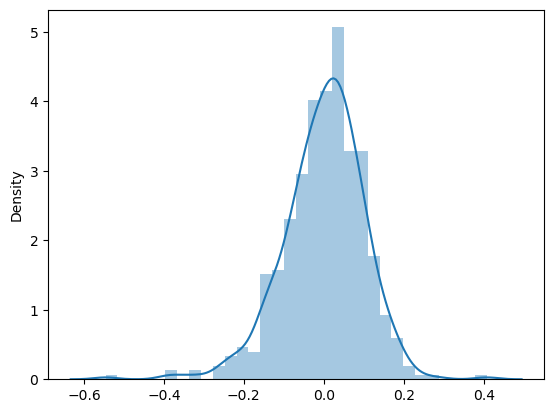

In [179]:
res=y_train - y_train_pred
sns.distplot(res)

Text(0, 0.5, 'y_train_pred')

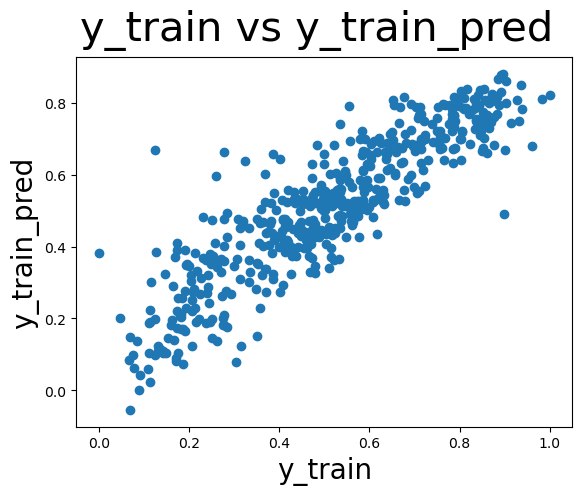

In [180]:
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 30) 
plt.xlabel('y_train', fontsize = 20)
plt.ylabel('y_train_pred', fontsize = 20) 

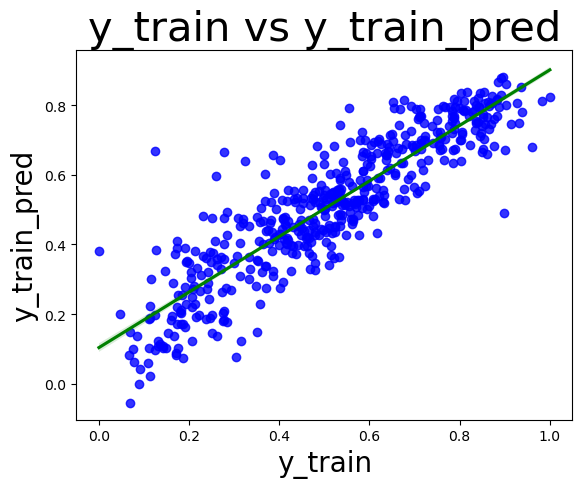

In [181]:
plt.figure()
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "green"})
plt.title('y_train vs y_train_pred', fontsize=30)
plt.xlabel('y_train', fontsize=20)
plt.ylabel('y_train_pred', fontsize=20)
plt.show()

# Homoscedasticity

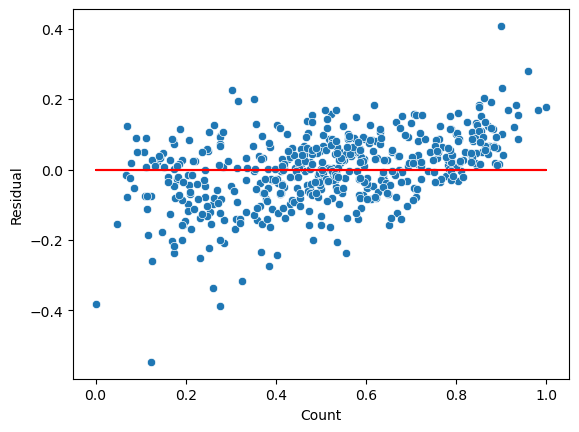

In [182]:
#y_train_pred = lr_6.predict(X_train_lm_6)
#residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=res)
plt.plot(y_train,y_train-y_train, '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Prediction and evaluation on the test set 

In [183]:
numvariables=['temp','hum','windspeed','cnt']

df_test[numvariables]=scaler.fit_transform(df_test[numvariables])
df_test.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,AUG,DEC,FEB,...,summer,winter,MON,SAT,SUN,THU,TUE,WED,Light Snow,Mist
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.470417,0.231142,0.725421,0,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.777843,0.443398,0.278853,0,0,0,...,0,1,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.236659,0.449707,0.545512,1,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.070765,0.682387,0.569148,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [184]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   hum         220 non-null    float64
 5   windspeed   220 non-null    float64
 6   cnt         220 non-null    float64
 7   AUG         220 non-null    int32  
 8   DEC         220 non-null    int32  
 9   FEB         220 non-null    int32  
 10  JAN         220 non-null    int32  
 11  JUL         220 non-null    int32  
 12  JUN         220 non-null    int32  
 13  MAR         220 non-null    int32  
 14  MAY         220 non-null    int32  
 15  NOV         220 non-null    int32  
 16  OCT         220 non-null    int32  
 17  SEP         220 non-null    int32  
 18  spring      220 non-null    int32  
 19  summer      220 non-null    int3

In [185]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,AUG,DEC,FEB,...,summer,winter,MON,SAT,SUN,THU,TUE,WED,Light Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.508362,0.418803,0.517923,0.059091,0.086364,0.100000,...,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.248645,0.200875,0.187683,0.239498,0.236333,0.281541,0.300684,...,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.650989,0.523975,0.687956,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
y_test=df_test.pop('cnt')
X_test=df_test

In [187]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,AUG,DEC,FEB,JAN,...,summer,winter,MON,SAT,SUN,THU,TUE,WED,Light Snow,Mist
184,0,1,0,0.837241,0.534223,0.149393,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.470417,0.231142,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.777843,0.443398,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.236659,0.449707,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.070765,0.682387,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [188]:
# add constant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   hum         220 non-null    float64
 5   windspeed   220 non-null    float64
 6   AUG         220 non-null    int32  
 7   DEC         220 non-null    int32  
 8   FEB         220 non-null    int32  
 9   JAN         220 non-null    int32  
 10  JUL         220 non-null    int32  
 11  JUN         220 non-null    int32  
 12  MAR         220 non-null    int32  
 13  MAY         220 non-null    int32  
 14  NOV         220 non-null    int32  
 15  OCT         220 non-null    int32  
 16  SEP         220 non-null    int32  
 17  spring      220 non-null    int32  
 18  summer      220 non-null    int32  
 19  winter      220 non-null    int3

In [189]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   workingday  220 non-null    int64  
 4   temp        220 non-null    float64
 5   hum         220 non-null    float64
 6   windspeed   220 non-null    float64
 7   AUG         220 non-null    int32  
 8   DEC         220 non-null    int32  
 9   FEB         220 non-null    int32  
 10  JAN         220 non-null    int32  
 11  JUL         220 non-null    int32  
 12  JUN         220 non-null    int32  
 13  MAR         220 non-null    int32  
 14  MAY         220 non-null    int32  
 15  NOV         220 non-null    int32  
 16  OCT         220 non-null    int32  
 17  SEP         220 non-null    int32  
 18  spring      220 non-null    int32  
 19  summer      220 non-null    int3

In [190]:
X_test_sm=X_test_sm.drop(['holiday','temp','hum','AUG','FEB','JUN','MAR','MAY','OCT','MON','SUN','THU','TUE','WED'],axis=1)


In [191]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   windspeed   220 non-null    float64
 4   DEC         220 non-null    int32  
 5   JAN         220 non-null    int32  
 6   JUL         220 non-null    int32  
 7   NOV         220 non-null    int32  
 8   SEP         220 non-null    int32  
 9   spring      220 non-null    int32  
 10  summer      220 non-null    int32  
 11  winter      220 non-null    int32  
 12  SAT         220 non-null    int32  
 13  Light Snow  220 non-null    int32  
 14  Mist        220 non-null    int32  
dtypes: float64(2), int32(11), int64(2)
memory usage: 18.0 KB


In [192]:
# PREDICT 

y_test_pred = lr_model.predict(X_test_sm)

Text(0, 0.5, 'y_test_pred')

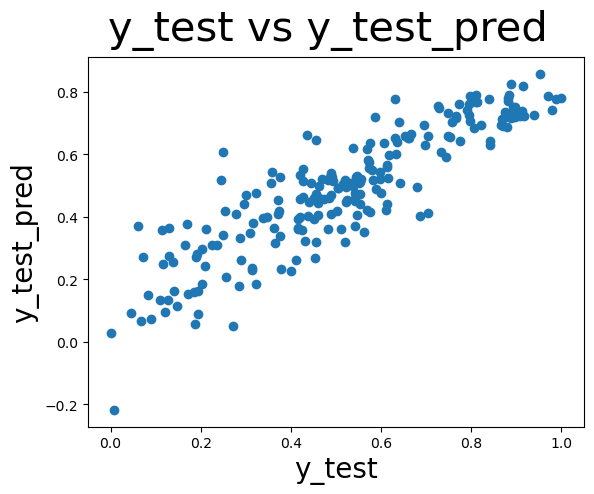

In [193]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 30) 
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_test_pred', fontsize = 20) 

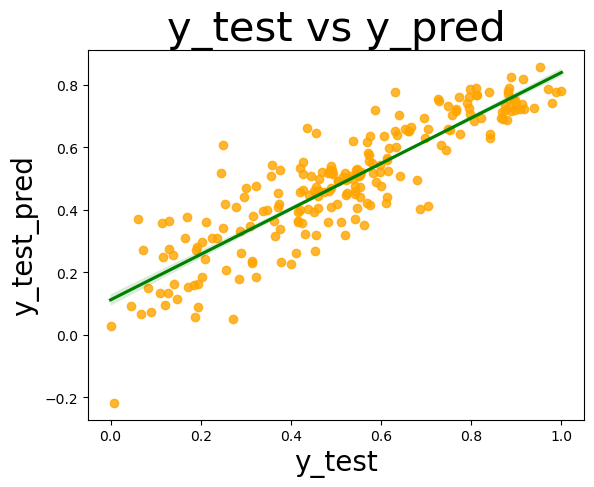

In [194]:
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "orange"}, line_kws={"color": "green"})
plt.title('y_test vs y_pred', fontsize=30)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_test_pred', fontsize=20)
plt.show()

In [195]:
# evaluate   for test and train 
print(r2_score(y_true=y_test,y_pred=y_test_pred))
print (r2_score(y_true=y_train,y_pred=y_train_pred))

0.7645190197692949
0.7976047065172861


## Observations -Demand for the bikes depend on the below variables
## windspeed,workingday,spring,winter,summer,year,NOV,JAN,SAT,Mist,DEC,JUL,SEP,Light Snow


